# Python在金融数据分析中的应用
说明：

1. 数据均保存`data`文件夹下。
2. 已有的文本和代码，不要改动。


提交要求：

1. 只提交ipynb文件，名为为“<span style="color:#BC544B">**学号-姓名.ipynb**</span>”。
2. 不需要提交数据文件。

## 第1部分：函数

### 问题

现在有多名同学的考试成绩。请写一个函数，根据考试成绩、分数线和名额，返回特定的信息。

要求：

写一个函数`enroll_list(candidates, passing_score, vacancy)`
1. 参数分别是：考生信息（数据见下方的已知信息） ，分数线和录取名额。
2. 给定任意的分数线和名额，返回一个字典dict，包括如下信息
    1. 分数线: passing_score
    2. 报考人数: n_candidates
    3. 过线人数: n_passed
    4. 录取人数: n_enrollment
    5. 录取者: matriculate。这是一个List，每个元素是（姓名, 分数），按分数高低排列。
3. 录取者的分数不低于分数线，且人数不多于名额。

###  已知信息

1. 考生名称和分数，保存在变量`candidates`中。

In [ ]:
candidates = {'张帅': 520, '李强': 535, '王帅': 540, '徐飞': 528, '齐奋': 533}

###  答题区

In [5]:
# 答题区
matriculate=[]#定义一个list，放入录取者信息，即过分数线名单
n_passed_stu={}#定义一个字典，放入过分数线名单信息，作为最终录取名单
candidates = {'张帅': 520, '李强': 535, '王帅': 540, '徐飞': 528, '齐奋': 533}
def enroll_list(candidates, passing_score, vacancy):
    for key,value in candidates.items():#把考生和分数先分开，后放入作为n_passed_stu字典的key和value
        if value>passing_score:#判断是否高于分数线，高于分数线才要
            n_passed_stu[key]=value
    dic_desc=sorted(n_passed_stu.items(),key=lambda x:x[1],reverse=True)
    for stu_pass in dic_desc[0:vacancy]:
        matriculate.append(stu_pass)
    n_candidates=len(candidates)
    n_passed=len(n_passed_stu)
    n_enrollment=len(matriculate)
    dic={"分数线":passing_score,"报考人数":n_candidates,"过线人数":n_passed,"录取人数":n_enrollment,"录取者":matriculate}
    return dic
enroll_list(candidates,534,2)

{'分数线': 534,
 '录取人数': 2,
 '录取者': [('王帅', 540), ('李强', 535)],
 '报考人数': 5,
 '过线人数': 2}

In [6]:
assert callable(enroll_list)

# 第2部分：综合

## 1. Pandas基本应用

有2份数据：

1. 银行卡机构信息.xlsx：包含不同银行发行的银行卡的卡号前缀、发卡行和类型。
2. 银行卡交易数据.xlsx：包含一系列刷卡记录。




## 1.1 数据整合

读取上述两份数据，根据每笔交易中卡号的前6位，确定每笔交易的银行卡来自什么机构，以及什么类型卡。

提示：
1. 在Pandas中，要截取字符串的一部分，见字符串方法`.str.slice()`。
2. merge要注意同名列的类型。

In [7]:
# 答题区

#引入pandas库
import pandas as pd
#分别读取两份保存在Excel的银行卡数据，放入df1、df2变量
df1=pd.read_excel("C:/Users/19360/Desktop/data/银行卡机构信息.xlsx")
df2=pd.read_excel("C:/Users/19360/Desktop/data/银行卡交易数据.xlsx")
#转化df1["前缀"]和df2["卡号"]的数据类型为字符串str
df1["前缀"]=df1["前缀"].astype(str)
df2["卡号"]=df2["卡号"].astype(str)
#对df2的“卡号”列的数据进行切片，截取前六位数据，并保存在新的“前缀”列中
df2["前缀"]=df2["卡号"].str.slice(0,6)
#在以改变“前缀”列数据类型的基础上，运用merge函数，根据相同列["前缀"]进行合并，按照df2数据顺序取交集，放入co_df变量
co_df=pd.merge(df2,df1)
co_df

,日期,城市,省份,金额,卡号,分类,前缀,机构,类型
0,2017-07-12,衡水,河北省,3800.00,510529******9329,购物,510529,工商银行,贷记卡
1,2017-07-12,秦皇岛,河北省,78.00,510529******7740,购物,510529,工商银行,贷记卡
2,2017-07-11,秦皇岛,河北省,199.50,510529******0742,购物,510529,工商银行,贷记卡
3,2017-07-11,秦皇岛,河北省,50.70,510529******1379,其它,510529,工商银行,贷记卡
4,2017-07-15,秦皇岛,河北省,280.00,510529******9331,购物,510529,工商银行,贷记卡
5,2017-07-12,丹东,辽宁省,480.00,622260******2798064,购物,622260,交通银行,借记卡
6,2017-07-12,秦皇岛,河北省,108.00,622260******4871369,购物,622260,交通银行,借记卡
7,2017-07-12,秦皇岛,河北省,54.00,622260******0009780,其它,622260,交通银行,借记卡
8,2017-07-12,秦皇岛,河北省,500.00,622260******2371048,交通,622260,交通银行,借记卡
9,2017-07-12,镇江,江苏省,3840.00,622260******2798062,住宿,622260,交通银行,借记卡


## 1.2 计算刷卡总金额前十名的银行

计算刷卡总金额前十名的银行。

1. 要求结果保存在变量`top10_banks`中
2. 结果是一个两列的DataFrame，两列分别`['机构','金额']`
3. 按金额降序排序

In [8]:
# 答题区

#运用groupby函数，对co_df数据按“机构”进行分组,并对机构所对应的每个金额进行求和
sumbank_1=co_df.groupby("机构").sum()
#运用sort_value函数，按金额进行降序排序，然后取前十名
top10_banks=sumbank_1.sort_values(by="金额",ascending=False)[:10]
#在按“分类”进行分组求和时，机构列成为了索引行，此时运用reset_index重置索引，使机构列成为dataframe的column索引列
top10_banks.reset_index(inplace=True)
top10_banks

,机构,金额
0,建设银行,406096.45
1,工商银行,356442.54
2,民生银行,253380.80
3,招商银行信用卡中心,239093.42
4,交通银行,220052.03
5,招商银行,145639.77
6,广发银行股份有限公司,139424.45
7,农业银行,115425.83
8,浦东发展银行,99171.55
9,中国银行,95395.52


In [9]:
assert type(top10_banks) == pd.DataFrame
assert list(top10_banks.columns) == ['机构','金额']
assert len(top10_banks) == 10

## 1.3 计算不同类型消费刷卡的总金额

计算不同类型消费刷卡的总金额

1. 要求结果保存在变量`type_amount`中
2. 结果是一个两列的DataFrame，两列分别`['分类','金额']`
3. 按金额降序排序

In [10]:
# 答题区

#运用groupby函数，对co_df数据按“分类”进行分组,并对机构所对应的每个金额进行求和
sumbank_2=co_df.groupby("分类").sum()
#运用sort_value函数，按金额进行降序排序
type_amount=sumbank_2.sort_values(by="金额",ascending=False)
#在按“分类”进行分组求和时，分类列成为了索引行，此时运用reset_index重置索引，使分类列成为dataframe的column索引列
type_amount.reset_index(inplace=True)
type_amount

,分类,金额
0,其它,1113592.66
1,购物,944055.48
2,住宿,240905.05
3,交通,187600.74
4,文化,160000.00
5,餐饮,18131.20
6,娱乐,600.00


In [11]:
assert type(type_amount) == pd.DataFrame
assert list(type_amount.columns) == ['分类','金额']
assert len(type_amount) > 0 

## 1.4 计算不同省份刷卡的总金额

计算不同省份刷卡的总金额。

1. 要求结果保存在变量`prov_amount`中
2. 结果是一个两列的DataFrame，两列分别`['省份','金额']`
3. 按金额降序排序


In [12]:
# 答题区

#运用groupby函数，对co_df数据按“省份”进行分组,并对身份所对应的每个金额进行求和
sumbank_3=co_df.groupby("省份").sum()
#运用sort_value函数，按金额进行降序排序
prov_amount=sumbank_3.sort_values(by="金额",ascending=False)
#在按“省份”进行分组求和时，省份列成为了索引行，此时运用reset_index重置索引，使省份列成为dataframe的column索引列
prov_amount.reset_index(inplace=True)
prov_amount

,省份,金额
0,河北省,2164156.60
1,北京市,147008.28
2,吉林省,75716.86
3,黑龙江省,48451.44
4,安徽省,43936.05
5,江西省,29200.90
6,辽宁省,20258.47
7,内蒙古自治区,16880.46
8,江苏省,14280.00
9,陕西省,11378.32


In [13]:
assert type(prov_amount) == pd.DataFrame
assert list(prov_amount.columns) == ['省份','金额']
assert len(prov_amount) > 0 

## 1.5 对每一家发卡机构，提取单笔最高的消费记录

对每一家发卡机构，提取单笔最高的消费记录，然后提取金额前10名的机构。

1. 要求结果保存在变量`top10_records`中
2. 结果是一个3列的DataFrame，3列分别`['卡号','金额','机构']`
3. 按金额降序排序

In [14]:
# 答题区

#运用groupby函数，按照机构进行分组后，对每组机构所对应的金额求最大值，用apply函数对每个机构对应的最大金额一行进行拼接
maxbank_4=co_df.groupby("机构").apply(lambda t:t[(t["金额"]==t["金额"].max())])
#在按“机构”进行分组时，机构列成为了索引行，此时运用reset_index重置索引，使机构列成为dataframe的column索引列
maxbank_5=maxbank_4.reset_index(drop=True)
#只提取maxbank_5的"卡号","金额","机构"三列，放入top10_records_all
top10_records_all=maxbank_5[["卡号","金额","机构"]]
#运用sort_value函数，按金额进行降序排序，然后取前十名
top10_records=top10_records_all.sort_values(by="金额",ascending=False)[:10]
top10_records

,卡号,金额,机构
37,421870******6321,160000.0,民生银行
34,439226******0264,159000.0,招商银行信用卡中心
31,436745******3240,150000.0,建设银行
29,622556******4230,110000.0,广发银行股份有限公司
27,622203******0003565,74274.0,工商银行
9,622252******9800,66300.0,交通银行
5,360884******72,60000.0,中国工商银行
52,621799******6385349,54000.0,邮政储蓄银行
1,621773******7769,50000.0,中信银行
41,625958******1182,39000.0,浦东发展银行


In [15]:
assert type(top10_records) == pd.DataFrame
assert list(top10_records.columns) == ['卡号','金额','机构']
assert len(top10_records) == 10

# 2. 寻找季度增长率最佳股票

数据：

1. 上市公司季报数据.xlsx：包括2017-2018年上市公司季报中的几项财务指标。


## 2.1 每股收益同比增长率

1. 读取数据，处理好数据类型，并保存为变量`df`。
2. 针对每一只股票，计算每股收益的 **同比增长率**（今年比上年同期），保存为df中的列 `"同比增长率"`。


In [2]:
# 答题区
import pandas as pd
import numpy as np
#读取Excel数据，放入到df中
df=pd.read_excel("C:/Users/19360/Desktop/data/上市公司季报数据.xlsx")
#运用groupby，对df按股票代码进行分组，运用pct_change求出其对应的每季度的每股收益的同比增长率
ab=df.groupby("股票代码")["每股收益"].pct_change(periods=4)
ab=pd.DataFrame(ab)
#将ab的每股收益列相对应的加到df中，保存到“同比增长率”列中
df["同比增长率"]=ab["每股收益"]
df

,股票代码,截止日期,每股收益,每股营业收入,每股净资产,每股资本公积,每股未分配利润,每股经营现金流,同比增长率
0,1,2017-03-31,0.361910,1.577228,12.098952,3.288585,4.046768,-6.698195,NaN
1,1,2017-06-30,0.731159,3.098660,12.315317,3.288585,4.258008,-7.465347,NaN
2,1,2017-09-30,1.115492,4.587828,12.703029,3.288585,4.642341,-9.201340,NaN
3,1,2017-12-31,1.350553,6.107688,12.932673,3.288585,4.639546,-6.917880,NaN
4,1,2018-03-31,0.384100,1.593302,13.010542,3.288585,4.685207,2.413628,0.061314
5,1,2018-06-30,0.778800,3.231450,13.287187,3.288585,4.944030,0.434188,0.065158
6,1,2018-09-30,1.191380,4.564822,13.700116,3.288585,5.356610,-0.658707,0.068031
7,1,2018-12-31,1.445428,6.185906,13.980315,3.288585,5.535061,-3.338556,0.070249
8,2,2017-03-31,0.062995,1.683936,14.673774,0.757019,5.606924,-0.862742,NaN
9,2,2017-06-30,0.661529,6.323899,14.598744,0.834095,5.415458,1.979333,NaN


In [17]:
assert type(df) == pd.DataFrame
assert '同比增长率' in list(df.columns)

## 2.2 同比连续增长的股票

1. 找到同比增长率连续4个季度大于20%的股票，股票代码保存为一个List，变量名为`inc_4y`。
2. 提示：分组后运算如果太复杂，难以使用聚合，可以考虑对分组进行循环。

In [3]:
#答题区
inc_4y=[]#定义一个list，用于保存符合条件的股票代码
I1=df.dropna(axis=0,subset=['同比增长率'])#删去已统计完同比增长率的df的空值，即没有同比增长率的股票行
dta=I1[["股票代码","同比增长率"]]#只提取股票代码和同比增长率两列，保存在dta
code=dta['股票代码'].value_counts()#对同个股票进行数数，每个数字即代表该股票有多少个季度
code=list(code[code==4].index)#把有4个季度的code的索引即股票代码提取出来
for t in range(len(code)):#循环已有4个季度的股票代码
    d=dta.iloc[dta.iloc[:,0].values==code[t],1].values#选中dta，按位置访问，访问第0列即股票代码列的所有行的值，让其与code[t]即已有
                                                      #4个季度的股票代码对应，找到匹配的所有行的第1列即同比增长率的值，将其赋给d
    if all(i>0.2 for i in d)>0.2:#判断d数组所有同比增长率是否都大于0.2
        inc_4y.append(code[t])#若大于0.2，则将符合的股票赋给inc_4y
inc_4y=list(set(inc_4y))#去掉重复代码，只保留一次
inc_4y.sort()#对股票列表进行排序
inc_4y

[2,
 31,
 32,
 40,
 62,
 403,
 425,
 507,
 520,
 528,
 553,
 557,
 560,
 568,
 596,
 597,
 603,
 611,
 629,
 630,
 631,
 632,
 636,
 650,
 661,
 672,
 676,
 680,
 683,
 690,
 708,
 717,
 731,
 735,
 739,
 778,
 788,
 789,
 799,
 810,
 818,
 830,
 831,
 858,
 860,
 868,
 880,
 898,
 902,
 932,
 952,
 961,
 968,
 1979,
 2009,
 2024,
 2040,
 2075,
 2087,
 2088,
 2095,
 2110,
 2125,
 2127,
 2133,
 2135,
 2138,
 2146,
 2189,
 2193,
 2225,
 2228,
 2233,
 2240,
 2253,
 2254,
 2258,
 2290,
 2299,
 2304,
 2305,
 2318,
 2321,
 2332,
 2333,
 2349,
 2353,
 2360,
 2371,
 2373,
 2378,
 2386,
 2391,
 2392,
 2402,
 2405,
 2406,
 2414,
 2422,
 2430,
 2442,
 2462,
 2463,
 2465,
 2487,
 2495,
 2507,
 2520,
 2545,
 2546,
 2549,
 2563,
 2579,
 2587,
 2593,
 2599,
 2614,
 2626,
 2632,
 2661,
 2675,
 2677,
 2685,
 2697,
 2698,
 2709,
 2727,
 2728,
 2741,
 2746,
 2751,
 2757,
 2768,
 2798,
 2803,
 200771,
 300003,
 300006,
 300031,
 300035,
 300047,
 300059,
 300094,
 300107,
 300120,
 300121,
 300122,
 30013

In [19]:
assert type(inc_4y) == list
assert len(inc_4y) > 0

## 2.3-2.4 每股资本公积和每股未分配利润

1. 对2017年末和2018年末的数据，分别求出"每股资本公积"和"每股未分配利润"最大的前10只股票（注：4组共20只）
2. 保存到reserve_2017、reeserve_2018、profit_2017和profit_2018这4个变量中（请顾名思义）
3. 每个变量，要求有3列： `[截止日期,股票代码, xxx ]`，最后一列为"每股资本公积"或"每股未分配利润"


In [20]:
# 答题区

#选取截止日期为2017年末的所有列，保存在df_1中
df_1=df[df["截止日期"]=="2017-12-31"]
#只提取df_1的'截止日期','股票代码', '每股资本公积'三列，放入df_2
df_2=df_1[['截止日期','股票代码', '每股资本公积']]
#运用sort_value函数，按每股资本公积进行降序排序，然后取前十名
reserve_2017=df_2.sort_values(by="每股资本公积",ascending=False)[:10]

df_3=df[df["截止日期"]=="2018-12-31"]
df_4=df_3[['截止日期','股票代码', '每股资本公积']]
reserve_2018=df_4.sort_values(by="每股资本公积",ascending=False)[:10]#18年每股资本公积

df_5=df[df["截止日期"]=="2017-12-31"]
df_6=df_5[['截止日期','股票代码', '每股未分配利润']]
profit_2017=df_6.sort_values(by="每股未分配利润",ascending=False)[:10]#17年每股未分配利润

df_7=df[df["截止日期"]=="2018-12-31"]
df_8=df_7[['截止日期','股票代码', '每股未分配利润']]
profit_2018=df_8.sort_values(by="每股未分配利润",ascending=False)[:10]#18年每股未分配利润

print(reserve_2017)
print(reserve_2018)
print(profit_2017)
print(profit_2018)
print()

             截止日期    股票代码     每股资本公积
20761  2017-12-31  600629  24.332609
1120   2017-12-31     547  22.799787
1896   2017-12-31     681  21.657756
11282  2017-12-31  300038  20.835036
3330   2017-12-31     938  20.209094
16258  2017-12-31  300679  18.818792
18181  2017-12-31  600233  15.765342
16356  2017-12-31  300695  14.947326
16133  2017-12-31  300660  14.831947
15802  2017-12-31  300613  14.817262
             截止日期    股票代码     每股资本公积
20765  2018-12-31  600629  24.332609
1900   2018-12-31     681  21.836276
14811  2018-12-31  300483  19.822527
1124   2018-12-31     547  15.852423
18185  2018-12-31  600233  15.776813
15806  2018-12-31  300613  15.738850
25954  2018-12-31  603444  14.975964
16360  2018-12-31  300695  14.947326
3334   2018-12-31     938  14.150074
16602  2018-12-31  300751  13.665494
             截止日期    股票代码    每股未分配利润
19985  2017-12-31  600519  63.693240
4855   2017-12-31    2143  37.132904
3927   2017-12-31    2027  29.028617
6135   2017-12-31    2304  17.592667
2

In [21]:
assert type(reserve_2017) == pd.DataFrame
assert list(reserve_2017.columns) == ['截止日期','股票代码', '每股资本公积']

## 2.5 绘图

1. 对上述4组股票，按各自数值从小到大排列，绘制2行2列的柱状图。
2. 局部范例（当然你绘制的图必须4组齐全）:

![](example2.svg)

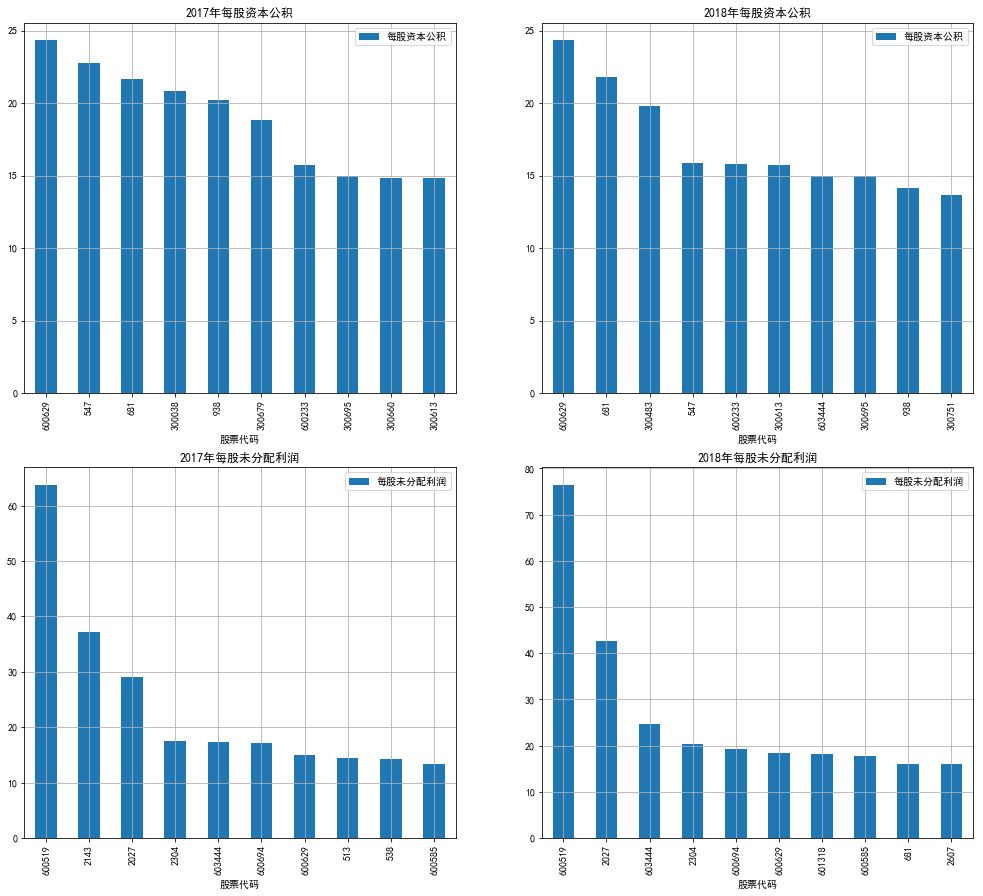

In [22]:
# 答题区

#引入matplotlib库
import matplotlib.pyplot as plt
#使用%matplotlib inline，使四个柱形图可以直接在notebook的画布里呈现
%matplotlib inline
#生成宽17英寸，高15英寸，背景颜色为白色的画布
fig=plt.figure(figsize=(17,15),facecolor="white")
#设置字体，使图中的中文字体正常编码显示
plt.rcParams["font.sans-serif"]=["SimHei"]
#生成子图，共两行两列，子图1：ax1表示位于左上第一个位置（top left）
ax1=fig.add_subplot(2,2,1)
#画出reserve_2017的数据柱形图，x轴为股票代码，y轴为每股资本公积，放置在ax1子图内，设置框线，标题为"2017年每股资本公积"
reserve_2017.plot(x="股票代码",y="每股资本公积",kind="bar",ax=ax1,grid=True,title="2017年每股资本公积")

ax2=fig.add_subplot(2,2,2)
reserve_2018.plot(x="股票代码",y="每股资本公积",kind="bar",ax=ax2,grid=True,title="2018年每股资本公积")

ax3=fig.add_subplot(2,2,3)
profit_2017.plot(x="股票代码",y="每股未分配利润",kind="bar",ax=ax3,grid=True,title="2017年每股未分配利润")

ax4=fig.add_subplot(2,2,4)
profit_2018.plot(x="股票代码",y="每股未分配利润",kind="bar",ax=ax4,grid=True,title="2018年每股未分配利润")
